In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic_dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
print("\nStatistiques descriptives :")
df.describe(include=["O"])


Statistiques descriptives :


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [101]:
df.shape

(891, 12)

In [102]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
df.isnull().sum().sum()

np.int64(866)

In [107]:
import missingno as msno

<Axes: >

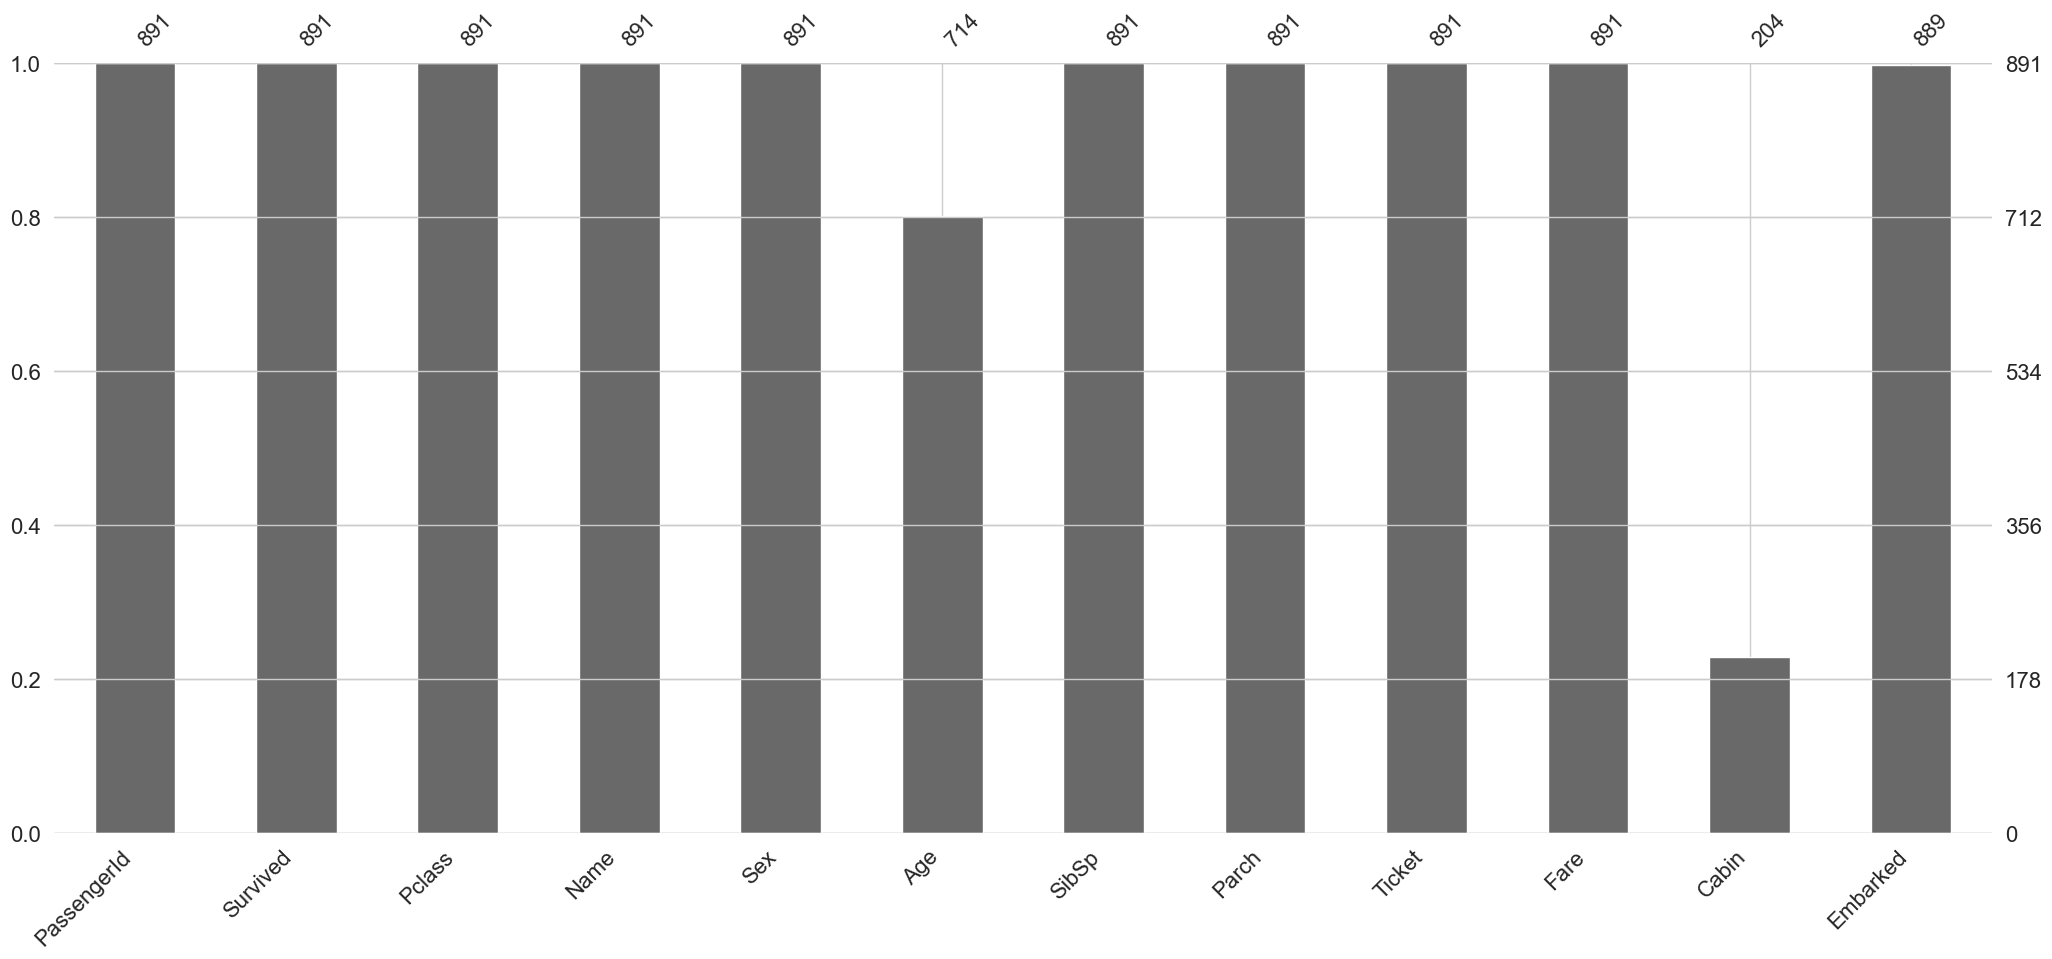

In [108]:
msno.bar(df)

In [109]:
df2=df.copy()

In [110]:
df2=df.dropna(axis=0)
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [111]:
df3=df.copy()
df3=df.dropna(subset='Embarked',axis=0)
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [112]:
df4=df.copy()
df4=df.drop(['Cabin'],axis=1)
df4.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [113]:
df5=df.copy()

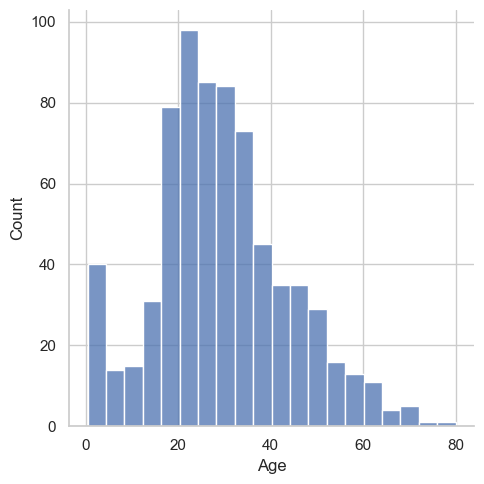

In [114]:
sns.displot(df['Age'])

In [115]:
df['Age_mean']=df['Age'].fillna(df['Age'].mean())

In [116]:
df['Age_mean'].isnull().sum()

np.int64(0)

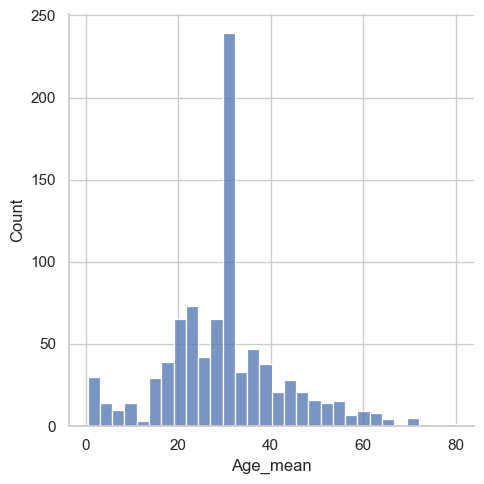

In [117]:
sns.displot(df['Age_mean'])

In [118]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Age']])
df['Age_mean_imputed']=imputer.transform(df[['Age']])
df['Age_mean_imputed']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_mean_imputed, Length: 891, dtype: float64

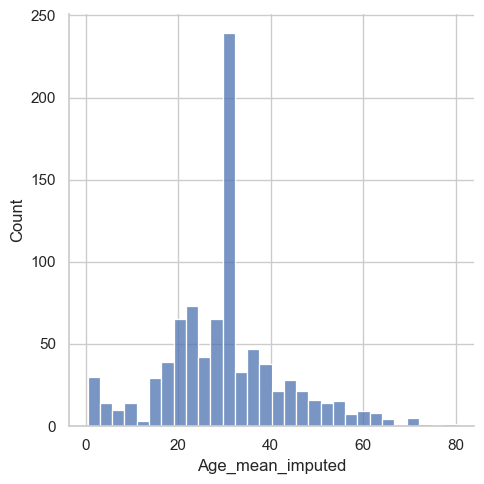

In [119]:
sns.displot(df['Age_mean_imputed'])


In [120]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
median_imputer.fit(df[['Age']])
df['Age_median_imputed'] = median_imputer.transform(df[['Age']])
df['Age_median'] = df['Age'].fillna(df['Age'].median())
df['Age_median_imputed']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median_imputed, Length: 891, dtype: float64

In [121]:
df['Embarked'].isnull().sum()

np.int64(2)

In [122]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [123]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [124]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5620\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [125]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [126]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [127]:
df['Age_Forward']=df['Age'].ffill()
df['Age_Forward']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age_Forward, Length: 891, dtype: float64

In [128]:
df['Age_Backward']=df['Age'].bfill()
df['Age_Backward']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age_Backward, Length: 891, dtype: float64

In [129]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean',
       'Age_mean_imputed', 'Age_median_imputed', 'Age_median', 'Age_Forward',
       'Age_Backward'],
      dtype='object')

In [130]:
df = pd.read_csv('titanic_dataset.csv')

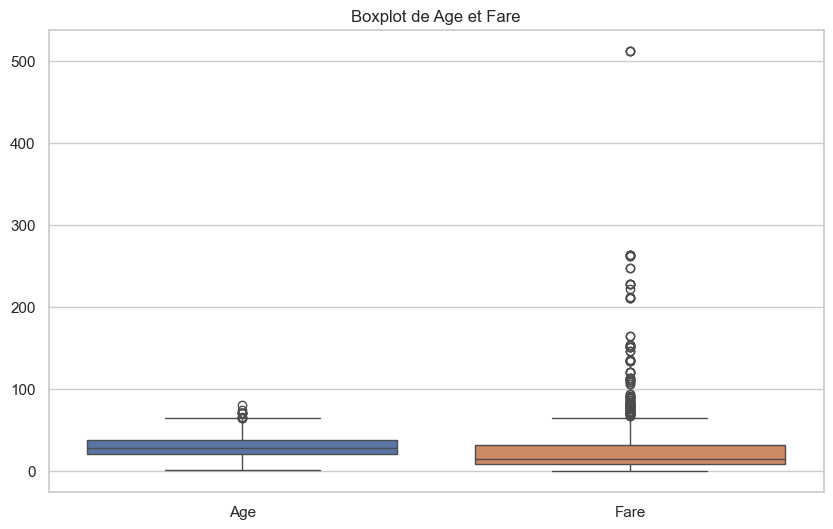

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age','Fare']])
plt.title('Boxplot de Age et Fare')
plt.show()

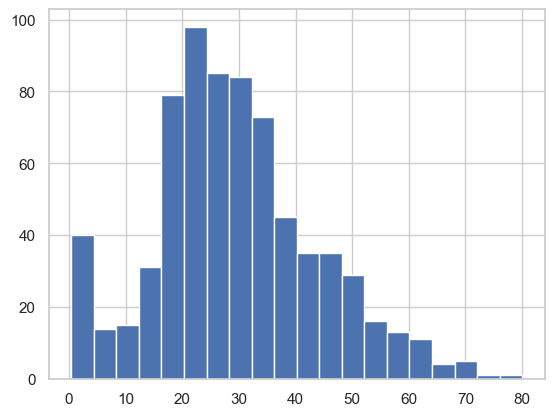

In [132]:
import matplotlib.pyplot as plt
plt.figure()
df['Age'].hist(bins='auto', alpha=1)
plt.show()

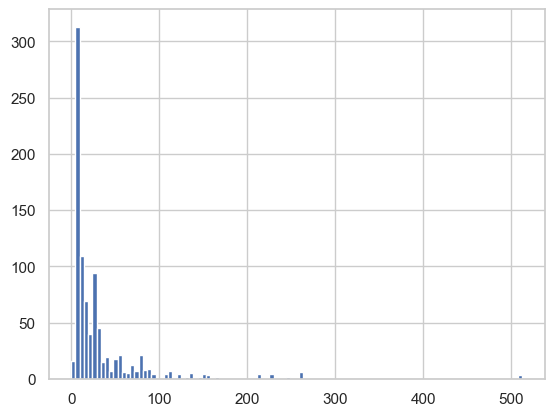

In [133]:
plt.figure()
df['Fare'].hist(bins='auto', alpha=1)
plt.show()

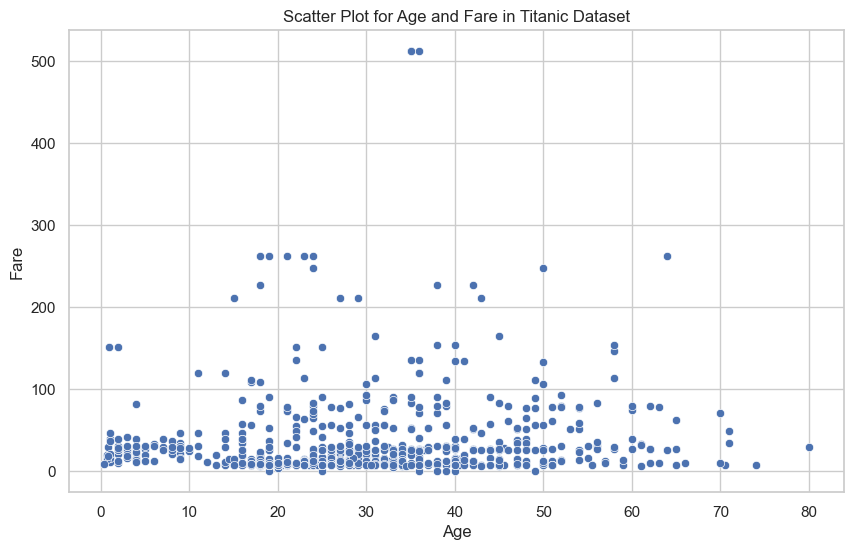

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Scatter Plot for Age and Fare in Titanic Dataset')
plt.show()

In [135]:
import pandas as pd
df = pd.read_csv('titanic_dataset.csv')

In [136]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [137]:
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [138]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [139]:
df.drop('Cabin', axis=1, inplace=True)

In [140]:
print("\nValeurs manquantes après traitement :")
print(df.isnull().sum())
df_saved=df


Valeurs manquantes après traitement :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [141]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [142]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)', expand=False)
print("Titres extraits des noms :")
print(df['Title'].unique())

Titres extraits des noms :
['Mr' 'Mrs' 'Miss' 'Master' 'Planke' 'Don' 'Rev' 'Billiard' 'der' 'Walle'
 'Dr' 'Pelsmaeker' 'Mulder' 'y' 'Steen' 'Carlo' 'Mme' 'Impe' 'Ms' 'Major'
 'Gordon' 'Messemaeker' 'Mlle' 'Col' 'Capt' 'Velde' 'the' 'Shawah'
 'Jonkheer' 'Melkebeke' 'Cruyssen']


In [143]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Other')

df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print("\nRépartition des titres après regroupement :")
print(df['Title'].value_counts())


Répartition des titres après regroupement :
Title
Mr             502
Miss           182
Mrs            122
Master          40
Other           20
y                4
Planke           3
Impe             3
Gordon           2
Billiard         1
Pelsmaeker       1
Mulder           1
Walle            1
der              1
Carlo            1
Steen            1
Messemaeker      1
Velde            1
the              1
Shawah           1
Melkebeke        1
Cruyssen         1
Name: count, dtype: int64


In [144]:
first_class = df[df['Pclass'] == 1]
print("Nombre de passagers en première classe :", len(first_class))

Nombre de passagers en première classe : 216


In [145]:
first_class = df[df['Pclass'] == 1]
print("Nombre de passagers en première classe :", len(first_class))

Nombre de passagers en première classe : 216


In [146]:
subset = df[['Name', 'Age', 'Sex', 'Survived']]
print("\nAperçu des colonnes sélectionnées :")
print(subset.head())


Aperçu des colonnes sélectionnées :
                                                Name   Age  Sex  Survived
0                            Braund, Mr. Owen Harris  22.0    1         0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0    0         1
2                             Heikkinen, Miss. Laina  26.0    0         1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0    0         1
4                           Allen, Mr. William Henry  35.0    1         0


In [147]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Taux de survie par classe :")
print(survival_by_class)

Taux de survie par classe :
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [148]:
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print("\nTaux de survie par sexe et classe :")
print(survival_by_sex_class)


Taux de survie par sexe et classe :
Sex  Pclass
0    1         0.968085
     2         0.921053
     3         0.500000
1    1         0.368852
     2         0.157407
     3         0.135447
Name: Survived, dtype: float64


In [149]:
bins = [0, 18, 35, 50, 100]
labels = ['Enfant', 'Jeune adulte', 'Adulte', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

print("Répartition des groupes d'âge :")
print(df['AgeGroup'].value_counts())

Répartition des groupes d'âge :
AgeGroup
Jeune adulte    535
Adulte          153
Enfant          139
Senior           64
Name: count, dtype: int64


In [150]:
df['IsAlone'] = (df['SibSp'] + df['Parch']) == 0
df['IsAlone'] = df['IsAlone'].map({True: 'Seul', False: 'En famille'})

print("\nRépartition des passagers voyageant seuls ou en famille :")
print(df['IsAlone'].value_counts())


Répartition des passagers voyageant seuls ou en famille :
IsAlone
Seul          537
En famille    354
Name: count, dtype: int64


In [151]:
survival_stats = df.groupby(['Pclass', 'Sex'])['Survived'].agg(['mean', 'count'])
survival_stats.rename(columns={'mean': 'SurvivalRate', 'count': 'PassengerCount'}, inplace=True)
print("Statistiques de survie par classe et sexe :")
print(survival_stats)

Statistiques de survie par classe et sexe :
            SurvivalRate  PassengerCount
Pclass Sex                              
1      0        0.968085              94
       1        0.368852             122
2      0        0.921053              76
       1        0.157407             108
3      0        0.500000             144
       1        0.135447             347


In [152]:
pivot_table = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("Table pivot : Taux de survie par classe et sexe :")
print(pivot_table)

Table pivot : Taux de survie par classe et sexe :
Sex            0         1
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [153]:
df.to_csv('titanic_cleaned.csv', index=False)
print("Le dataset transformé a été exporté vers 'titanic_cleaned.csv'.")

Le dataset transformé a été exporté vers 'titanic_cleaned.csv'.


In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

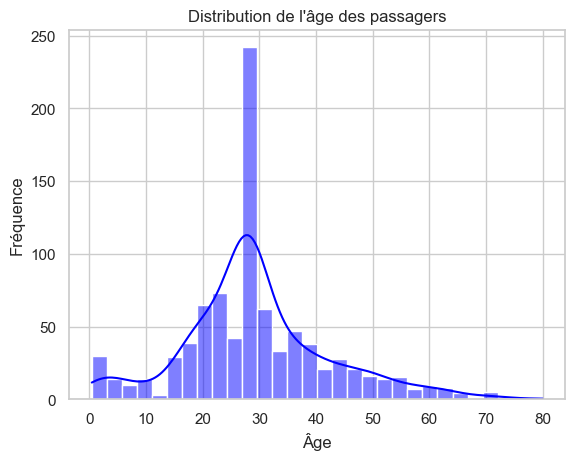

In [156]:
sns.histplot(df_saved['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution de l\'âge des passagers')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

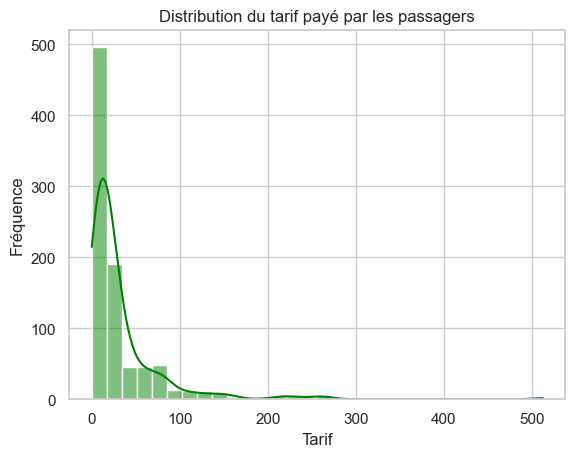

In [157]:
sns.histplot(df_saved['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution du tarif payé par les passagers')
plt.xlabel('Tarif')
plt.ylabel('Fréquence')
plt.show()

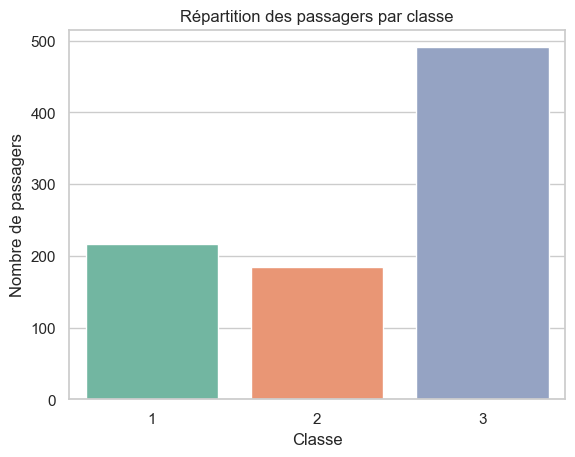

In [158]:
sns.countplot(x='Pclass', data=df_saved, hue='Pclass', palette='Set2', legend=False)
plt.title('Répartition des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

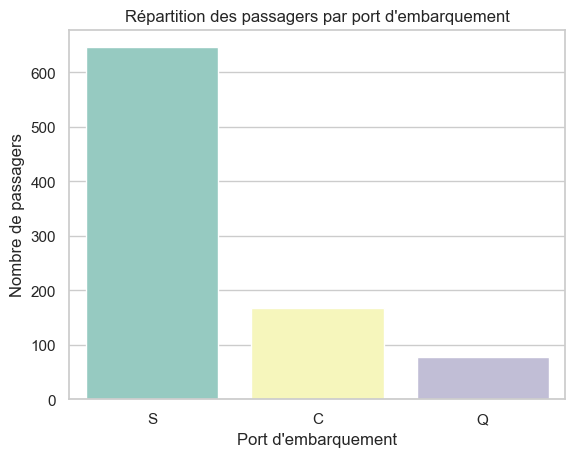

In [159]:
sns.countplot(x='Embarked', data=df_saved, hue='Embarked', palette='Set3', legend=False)
plt.title('Répartition des passagers par port d\'embarquement')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')
plt.show()

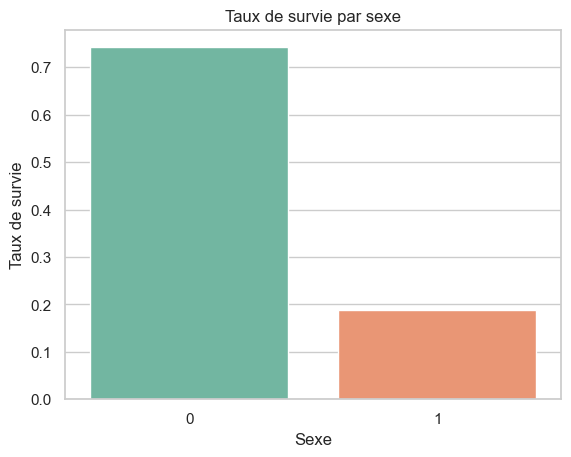

In [160]:
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df_saved, palette='Set2', errorbar=None, legend=False)
plt.title('Taux de survie par sexe')
plt.xlabel('Sexe')
plt.ylabel('Taux de survie')
plt.show()

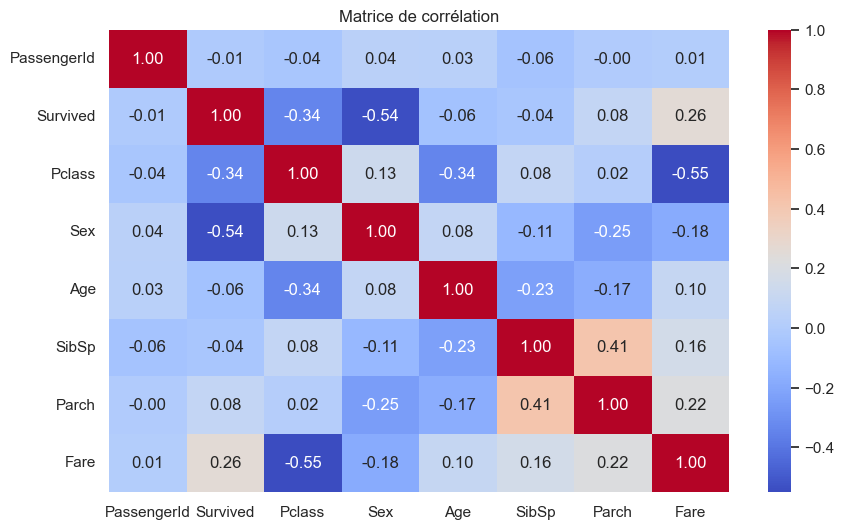

In [161]:
plt.figure(figsize=(10, 6))
corr_matrix = df_saved.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

In [169]:
from scipy import stats 
import numpy as np 
d=df[['Age','Fare']]

In [170]:
z_scores = stats.zscore(d)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
d['outlier'] = outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_5620\3608842335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['outlier'] = outliers


In [171]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      891 non-null    float64
 1   Fare     891 non-null    float64
 2   outlier  891 non-null    bool   
dtypes: bool(1), float64(2)
memory usage: 14.9 KB


In [172]:
q1 = d[['Age','Fare']].quantile(0.25)
q3 = d[['Age','Fare']].quantile(0.75)
iqr = q3 - q1

In [173]:
iqr

Age     13.0000
Fare    23.0896
dtype: float64

In [174]:
outlier_step = 1.5

In [176]:
outliers = ((d[['Age','Fare']] < (q1 - outlier_step * iqr)) | (d[['Age','Fare']] > (q3 + outlier_step * iqr ))).any(axis=1)
d['outlier'] = outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_5620\714370933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['outlier'] = outliers
